# Plots after photoreceptor quantification in Napari.ipynb
***

***
## Index<a id='Index'>∮</a>
***
- [Load modules](#loadModules)
- [tbx2 F&empty;](#tbx2F0)
- [foxq2 F&empty;](#foxq2F0)
***

***
## Load modules<a id='loadModules'>∮</a>
***
Back to [Index](#Index)

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import colorsys
import importlib
import svgutils
from svgutils.compose import *
import os.path

In [2]:
#gene Colors
zfC = {
    'R'  : '#7d7d7d',
    'U' : '#B73AB9',
    'S' : '#4364F6',
    'M' : '#59CB3B',
    'L' : '#CE2A22',
}

zfG = {
    'wt' : '#000000',
    'tbx2a' : '#ab266b',
    'tbx2b' : '#421f8e',
    'foxq2' : '#001dd6',
}

zfGm = {
    'wt' : 'o',
    'tbx2a' : 'P',
    'tbx2b' : 'X',
    'foxq2' : '^',
}

def formatFigureMain(figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    axH.set_xscale('linear')
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.set_xlabel(axH.get_xlabel(), fontproperties = fontTicks)
    axH.set_ylabel(axH.get_ylabel(), fontproperties = fontTicks)
    return fontLabels

def formatFigure(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
#     axH.set_xlabel('wt vs. cr', fontproperties=fontLabels)
    axH.set_ylabel('cells per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

def formatFigureRvU(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('Rods per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('UV cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)
    
def formatFigureMvS(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('M cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('S cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

    
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import colorsys
    try:
        c = matplotlib.colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*matplotlib.colors.to_rgb(c))
    return matplotlib.colors.rgb2hex(colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2]))

In [3]:
# dark background
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "w"}
plt.rcParams.update(params)

In [4]:
# white background
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "k"}
plt.rcParams.update(params)

***
## tbx2 F&empty;<a id='tbx2F0'>∮</a>
***
[Back to Index](#Index)

In [ ]:
dPath = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRfoxq2F0/"
fName = "CRfoxq2ResultsAll.csv"

df = pd.read_csv(dPath + fName)
df

***
## foxq2 F&empty;<a id='foxq2F0'>∮</a>
***
[Back to Index](#Index)

In [71]:
dPath = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRfoxq2F0/"
fName = "CRfoxq2ResultsAll.csv"

df = pd.read_csv(dPath + fName)
df

,filename,CRgene,R,U,S,M,L,Sop,Unnamed: 8
0,20210514_5dpf_mw2G_s2C_uninj_L14b,wt,NaN,NaN,130.0,199.0,NaN,NaN,NaN
1,20210514_5dpf_mw2G_s2C_uninj_L16b,wt,NaN,NaN,104.0,161.0,NaN,NaN,NaN
2,20210514_5dpf_mw2G_s2C_uninj_L17b,wt,NaN,NaN,107.0,170.0,NaN,NaN,NaN
3,20210514_5dpf_mw2G_s2C_uninj_L18b,wt,NaN,NaN,128.0,204.0,NaN,NaN,NaN
4,20210514_5dpf_mw2G_s2C_uninj_L19b,wt,NaN,NaN,112.0,174.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
100,20210514_5dpf_xOG_s1C_CRfoxq2_L03b,foxq2,45.0,131.0,NaN,NaN,NaN,NaN,NaN
101,20210514_5dpf_xOG_s1C_CRfoxq2_L04b,foxq2,26.0,143.0,NaN,NaN,NaN,NaN,NaN
102,20210514_5dpf_xOG_s1C_CRfoxq2_L06b,foxq2,30.0,130.0,NaN,NaN,NaN,NaN,NaN
103,20210514_5dpf_xOG_s1C_CRfoxq2_L07b,foxq2,26.0,145.0,NaN,NaN,NaN,NaN,NaN


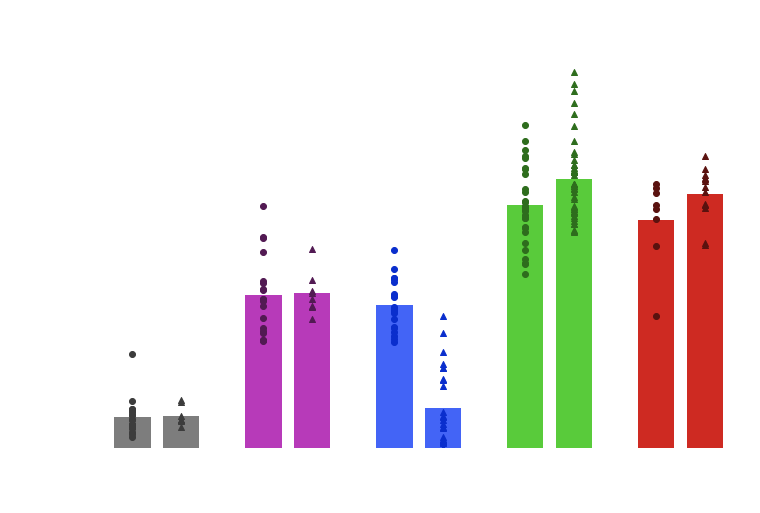

In [72]:
geneList = ['wt','foxq2']
photoreceptors = ['R','U','S','M','L']

plotname = ''
fH, axH = plt.subplots(figsize= [12,8])

barW = np.size(geneList)+2; # bar width
barD = np.size(geneList)+1; # bar distance whitin 1 photoreceptor subtype
barP = -np.size(geneList)+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions

j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        pH = plt.bar([i+j/barD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/barW, color=zfC[pr]);
        pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/barD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels(geneList * len(photoreceptors));
axH.set_ylim([0,400]);

savePath = dPath
plt.savefig(dPath + "Counts_foxq2.png", transparent=True, format="png")
plt.savefig(dPath + "Counts_foxq2.svg", transparent=True, format="svg")